# NVIDIA Technical Analysis
This code provides insights in the stock price of NVIDIA Corporation (NVDA). 

Starting with downloading the data with ***yfinance*** library, 10-day and 30-day Moving Averages are calculated in order to derive the buy signals for the stock, specifically:
- When the 10-day MA crosses above the 30-day MA and they are both directed upwards: BUY!

The **first plot** shows the comparison between Stock Price, 10-day MA, and 30-day MA, with Fibonacci retracements. This last element shows:
- 38.2% retracements: the prior trend continues, considered natural retracements in a healthy trend;
- 61.8% retracements: a new trend is establishing;
- 50% retracements: period of indecision (not encountered in this case)

The **second plot** shows the volume traded in the same time span.

The **third plot** shows the MACD (Moving Average Convergence Divergence), an oscillator derived by subtracting the longer MA from the shorter MA, together with the Equilibrium line. 
Here, it is highlited the bullish period for the stock, which is when the oscillator crosses above the equilibrium line, meaning that the the shorter MA has a greater value than the longer MA.

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import numpy as np
import pandas as pd
import datetime
import seaborn as sns

[*********************100%%**********************]  1 of 1 completed


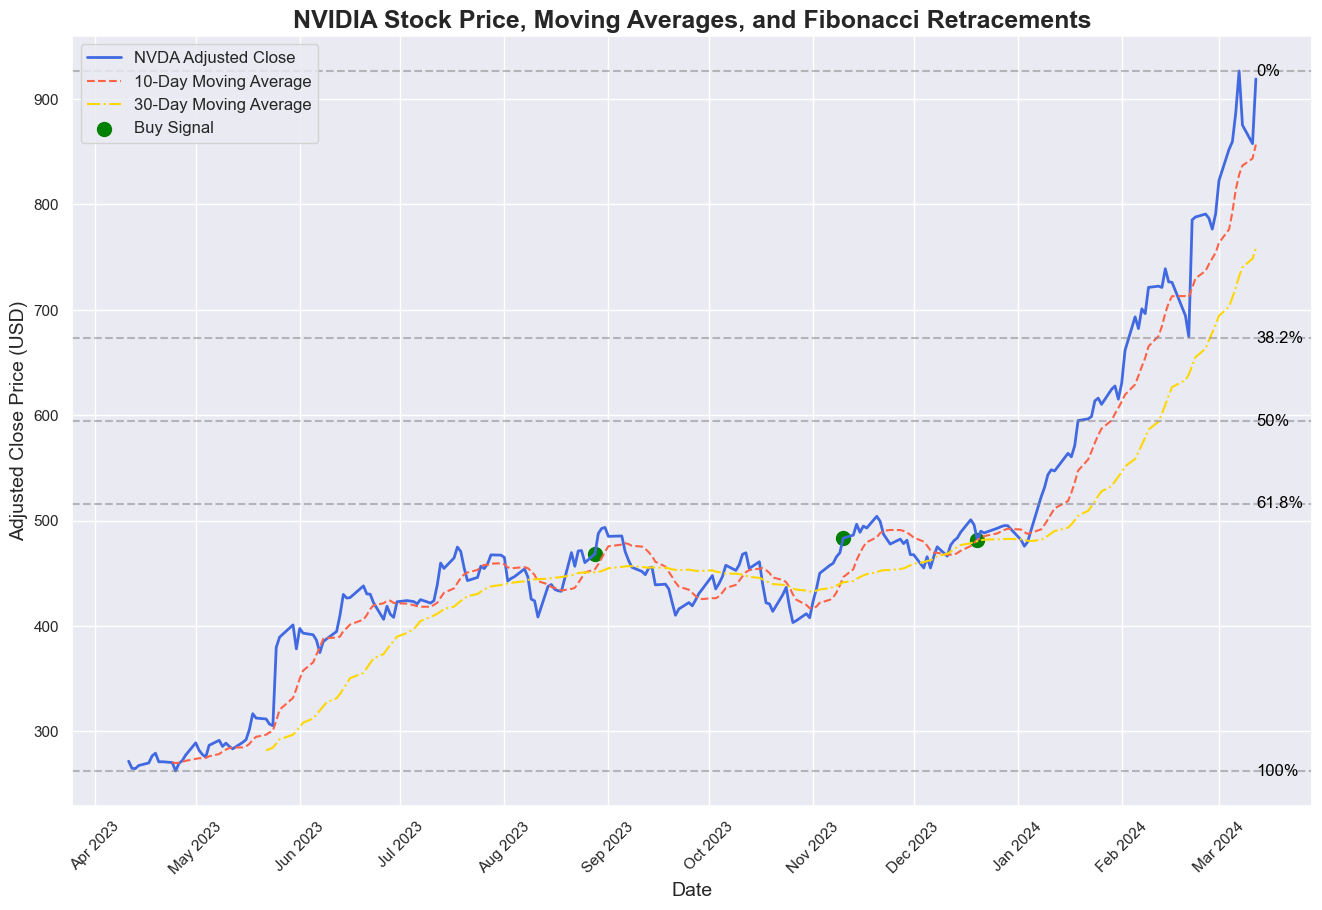

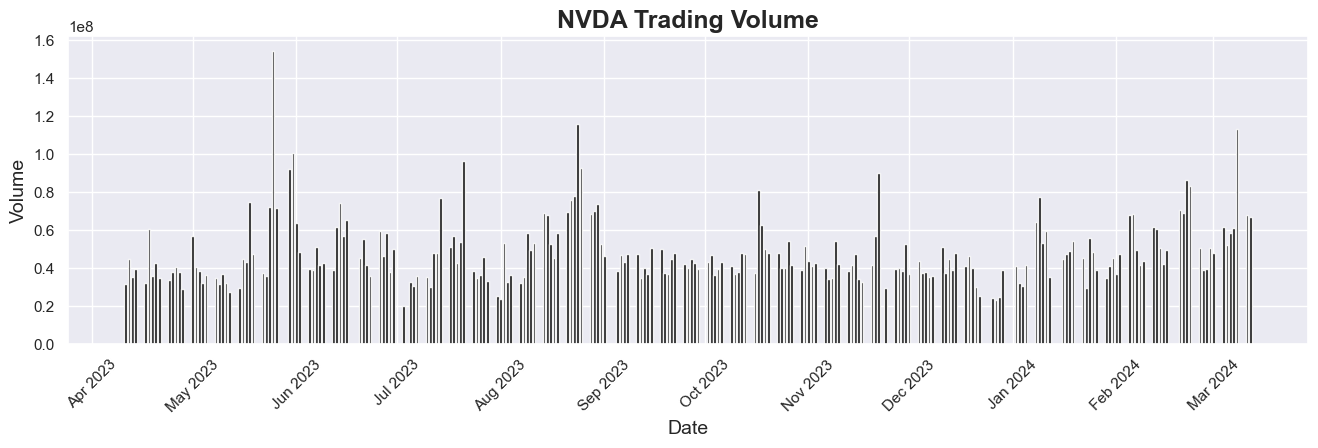

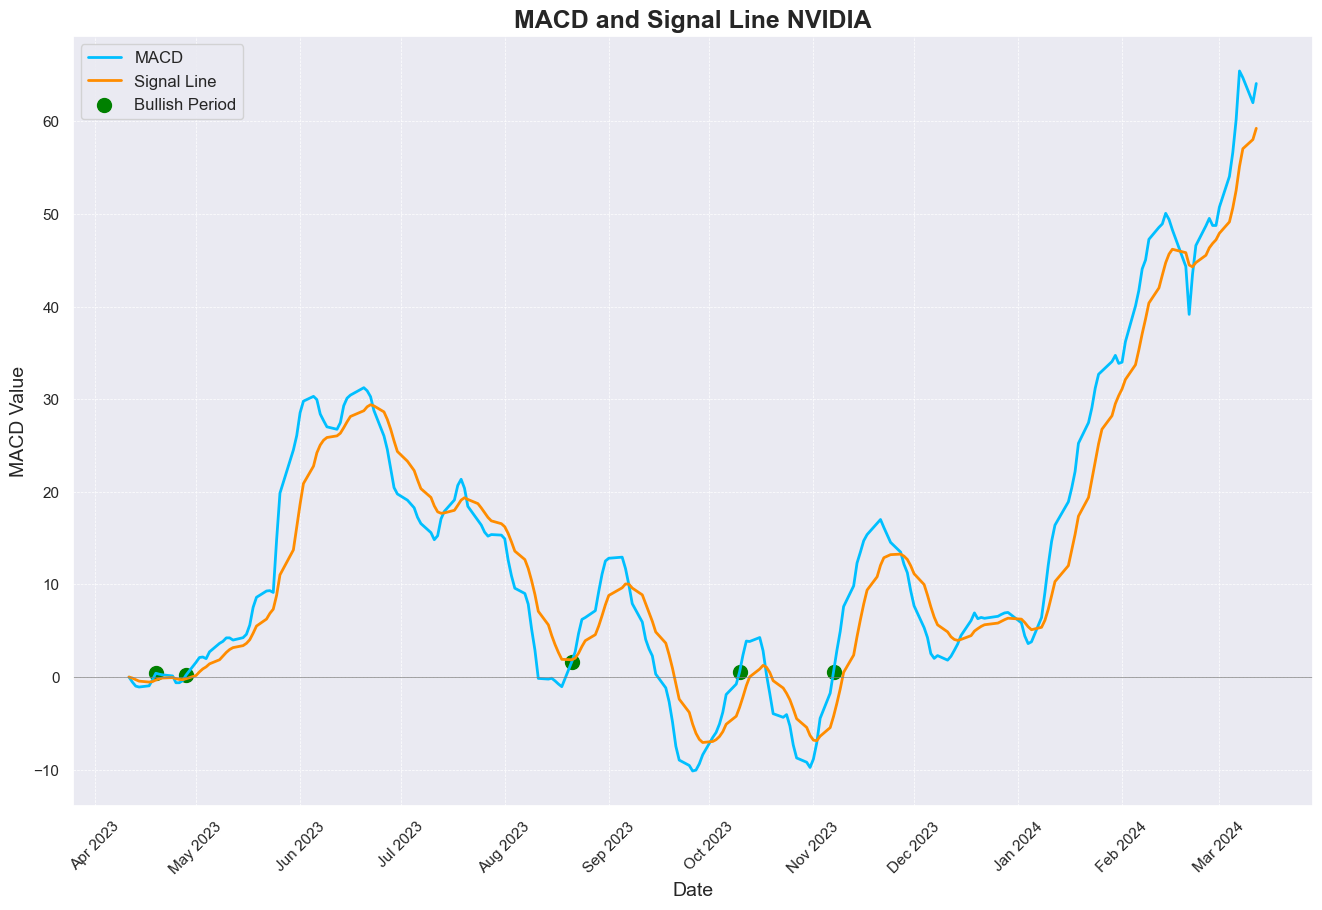

In [3]:
sns.set_theme(style='darkgrid')

#Start and end dates
start_date = '2023-04-11'
end_date = pd.to_datetime('now').strftime('%Y-%m-%d')

#Download data
data = yf.download(
    'NVDA', 
    start=start_date, 
    end=end_date, 
    interval='1d'
)

#Indicators
data['MA10'] = data['Adj Close'].rolling(window=10).mean()
data['MA30'] = data['Adj Close'].rolling(window=30).mean()
data['MA10_prev'] = data['MA10'].shift(1)
data['MA30_prev'] = data['MA30'].shift(1)
data['MACD'] = data['Adj Close'].ewm(
    span=12, 
    adjust=False).mean() - data['Adj Close'].ewm(
    span=26, adjust=False
).mean()
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()
data['Buy_Signal'] = (
    (data['MA10'] > data['MA30']) &
    (data['MA10_prev'] <= data['MA30_prev']) &
    (data['MA10'] > data['MA10'].shift()) &
    (data['MA30'] > data['MA30'].shift())
)
data['Bullish_Mkt'] = (data['MACD'] > 0) & (data['MACD'].shift(1) <= 0)

#Fibonacci Retracement Levels
low_price = data['Adj Close'].min()
high_price = data['Adj Close'].max()
fib_levels = [0, 38.2, 50, 61.8, 100]
price_dif = high_price - low_price
fib_retracements = {
    level: high_price - (price_dif * (level / 100)
                        ) for level in fib_levels
}

#Plot 1: Price and MAs with Buy Signals and Fibonacci Retracements
plt.figure(figsize=(16, 10))
plt.plot(
    data.index, 
    data['Adj Close'], 
    label='NVDA Adjusted Close', 
    color='royalblue', 
    linewidth=2
)
plt.plot(
    data.index, 
    data['MA10'], 
    label='10-Day Moving Average', 
    color='tomato', 
    linestyle='--'
)
plt.plot(
    data.index, 
    data['MA30'], 
    label='30-Day Moving Average', 
    color='gold', 
    linestyle='-.'
)

#Fibonacci levels to the plot and annotate
for level, retracement_price in fib_retracements.items():
    plt.axhline(
        y=retracement_price, 
        color='grey', 
        linestyle='--', 
        alpha=0.5)
    plt.text(
        x=data.index[-1], 
        y=retracement_price, 
        s=f'{level}%', 
        verticalalignment='center', 
        fontsize=12, 
        color='black'
    )

plt.scatter(
    data.index[data['Buy_Signal']], 
    data['Adj Close'][data['Buy_Signal']], 
    color='green', 
    label='Buy Signal', 
    marker='o', 
    s=100
)
plt.title(
    'NVIDIA Stock Price, Moving Averages, and Fibonacci Retracements', 
    fontsize=18, 
    fontweight='bold'
)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price (USD)', fontsize=14)
plt.legend(fontsize=12, loc='upper left')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.show()

#Plot 2: Volume
plt.figure(figsize=(16, 4))
plt.bar(data.index, data['Volume'], color='black', alpha=0.9)
plt.title('NVDA Trading Volume', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.show()

#Plot 3: MACD, Signal Line, and Equilibrium Line with Bullish Signals
plt.figure(figsize=(16, 10))
plt.plot(
    data.index, 
    data['MACD'], 
    label='MACD', 
    color='deepskyblue', 
    linewidth=2
)
plt.plot(
    data.index, 
    data['Signal_Line'], 
    label='Signal Line', 
    color='darkorange', 
    linewidth=2
)
plt.axhline(0, color='grey', linewidth=0.5) 
plt.scatter(
    data.index[data['Bullish_Mkt']], 
    data['MACD'][data['Bullish_Mkt']], 
    color='green', 
    label='Bullish Period', 
    marker='o', 
    s=100
)
plt.title(
    'MACD and Signal Line NVIDIA', 
    fontsize=18, 
    fontweight='bold'
)
plt.xlabel('Date', fontsize=14)
plt.ylabel('MACD Value', fontsize=14)
plt.legend(fontsize=12)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.show()

## Candlestick chart
The following code shows plots 1 and 2 combined, with the Stock Price showed in the form of Candles, in oder to reflect the volume traded per day, as well as the price trend.

[*********************100%%**********************]  1 of 1 completed


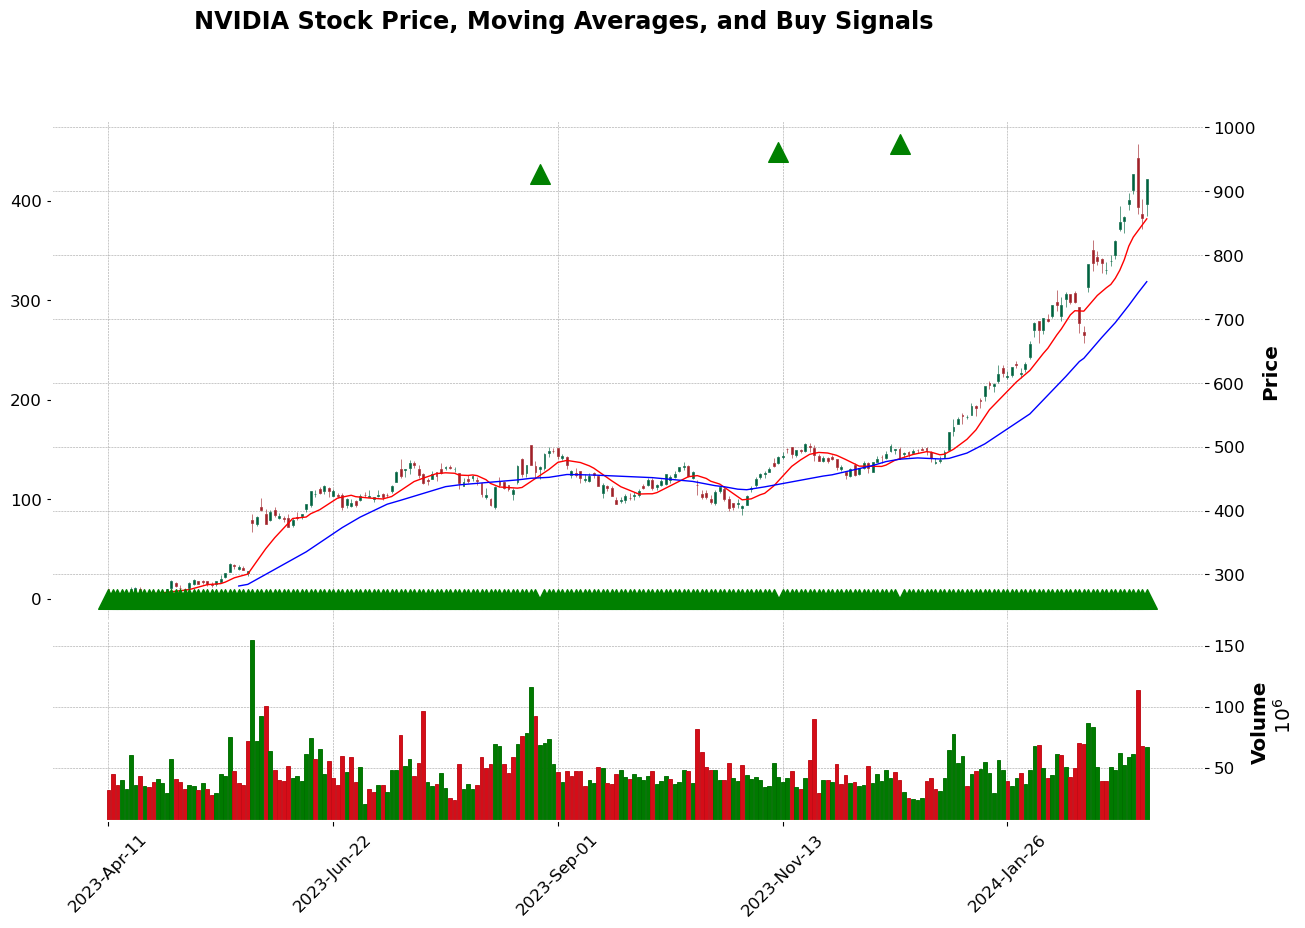

In [4]:
sns.set_theme(style='darkgrid')

#Start and end dates
start_date = '2023-04-11'
end_date = pd.to_datetime('now').strftime('%Y-%m-%d')

#Download data
data = yf.download(
    'NVDA', 
    start=start_date, 
    end=end_date, 
    interval='1d'
)

#Indicators
data['MA10'] = data['Adj Close'].rolling(window=10).mean()
data['MA30'] = data['Adj Close'].rolling(window=30).mean()
data['MA10_prev'] = data['MA10'].shift(1)
data['MA30_prev'] = data['MA30'].shift(1)
data['MACD'] = data['Adj Close'].ewm(
    span=12, 
    adjust=False).mean() - data['Adj Close'].ewm(
    span=26, adjust=False
).mean()
data['Signal_Line'] = data['MACD'].ewm(
    span=9, adjust=False
).mean()
data['Buy_Signal'] = (
    (data['MA10'] > data['MA30']) &
    (data['MA10_prev'] <= data['MA30_prev']) &
    (data['MA10'] > data['MA10'].shift()) &
    (data['MA30'] > data['MA30'].shift())
)
data['Bullish_Mkt'] = (data['MACD'] > 0) & (data['MACD'].shift(1) <= 0)

#Market data for mplfinance
market_data = data[
    ['Open', 'High', 'Low', 'Close', 'Volume']
].copy()

# plots for MA10, MA30, and Buy Signals
addplots = [
    mpf.make_addplot(
        data['MA10'], 
        color='red', 
        linestyle='-', 
        width=1
    ),
    mpf.make_addplot(
        data['MA30'], 
        color='blue', 
        linestyle='-', 
        width=1
    ),
    mpf.make_addplot(
        data['Buy_Signal'] * data['Low'] * 0.95, 
        type='scatter', 
        markersize=200, 
        marker='^', 
        color='green', 
        alpha=1
    ),
]

#Plotting the candlestick chart
mpf_style = mpf.make_mpf_style(
    base_mpf_style='charles', 
    rc={'font.size': 12}
)
mpf.plot(
    market_data, 
    type='candle', 
    addplot=addplots, 
    style=mpf_style, 
    figsize=(16, 10), 
    volume=True, 
    title='NVIDIA Stock Price, Moving Averages, and Buy Signals', 
    ylabel='Price', 
    ylabel_lower='Volume'
)

# So...?
Well, we are talking about the most boosted company's shares in the world, currently.

From the analysis undertaken, the conclusion shows how, now, both the 10-day and 30-day MAs and MACD analysis say that we passed the "buy period" by far.

However, factors such as Earning announcements and company's strategy need to be considered. Probably, the company has now set new Price standards, so that a YTD analysis is already outdated...

### This paper does not represent financial advice.